## Penguins

#### Columns in the dataset
- species: penguin species (Chinstrap, Adélie, or Gentoo)
- island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
- bill_length_mm: bill length (mm)
- bill_length_mm: bill depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- Sex: penguin sex

In [17]:
import pandas as pd
import numpy as np
from summarytools import dfSummary
import seaborn as sns

In [18]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/penguins.csv

zsh:1: command not found: wget


In [19]:
path = "https://frenzy86.s3.eu-west-2.amazonaws.com/python/penguins.csv"

In [20]:
df = pd.read_csv(path)

In [21]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male
...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207,4000,male
329,Chinstrap,Dream,43.5,18.1,202,3400,female
330,Chinstrap,Dream,49.6,18.2,193,3775,male
331,Chinstrap,Dream,50.8,19.0,210,4100,male


In [22]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,species[object],1. Adelie2. Gentoo3. Chinstrap,146 (43.8%)119 (35.7%)68 (20.4%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABl0lEQVR4nO3bQWrbUBSF4atiQjORMAYvxovoYrsI7cYEa9CETNRBhu0wOe/l6ftWcBN+bGR0pn3fCxJ+tD6A45iq6rmqnlof0pH3fd9fWx8xotPlcvk1z/O59SG92LbtZZqm34L7fKd5ns+32+11WZa31se09ng8fq7rer7f709VJbZPdqqqWpbl7Xq9/ml9TCeeWx8wKg8IxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2Ig5VX28x9X6kB74P3yt07ZtL+u6nst7XFX18aZuVb23vmNENgj/skH4IpMpHymjf7L5lOrI0OsqS6m+DLuuspTqz+jrKk/YHfGjLjFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZihl1Xjfg3fXdDr6sspfpig0CMdRUxHhCI6eFr1FfdQTSf8pnbHUfTKZ+53bH0MOUb7icX/s8DAjFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZimk75zO2OpfmUz9zuOGwQiDHlI+YvSryjSrcSH/QAAAAASUVORK5CYII="">",0(0.0%)
2,island[object],1. Biscoe2. Dream3. Torgersen,163 (48.9%)123 (36.9%)47 (14.1%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABm0lEQVR4nO3bQWrbABRF0a8iQjORMAYvxovoYrsI7cYYa9CETJRBRg0Z1Cl6kqxzVvBtLjYyfs00TQUJP5Y+gP1oquq5qp6WPmRD3qZpeln6iC1qj8fjr67rDksfshXjOF6bpvktuPu1XdcdzufzS9/3r0sfs3a32+3nMAyHy+XyVFViu1NbVdX3/evpdPqz9DEb8bz0AVvlAYEYsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMW3Vx/+0lj5kC7xP/6cdx/E6DMOh/E/rn4zjeK2qt6Xv2CIbhPvZIHxTY8pHyl4+2XwarcAu1lUWUevw8Osqi6j12Mu6ypP2CvhRlxixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxD7+ueuTXtjW7WFdZRK2DDQIx1lXEeEAgZs6vUV9d/GW2KZ/5HJ/NMuUzn+Mrc075HvanFL7HAwIxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YmaZ8pnP8ZXZpnzmc3xmg0CMKR8x70q8o0ovbDR2AAAAAElFTkSuQmCC"">",0(0.0%)
3,bill_length_mm[float64],Mean (sd) : 44.0 (5.5)min < med < max:32.1 < 44.5 < 59.6IQR (CV) : 9.1 (8.0),163 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC5klEQVR4nO3dsU7bQBjA8e8SkpoQ2URRYWPpwFCpg8c8RB+2j9CBB0AMXTqxIUFkhBs3juMuBYUF4jsf9nf5//ZLPPyVxB/H2dR1LUDfDbq+AGAfR11fAF4zxhyLyNjhJdZ1Xa/aup6+INQeMcYcz+fz73Ecz2xf4/HxcWmM+RFarITaL+M4jmeLxWKVJEnRdHGWZdHV1dXs/v5+LCKECr+SJCnOzs7+WC4/bvVieoKbKahAqFCBUKFCr3+jOo5qghzTHKrehuo6qgl1THOoehuqOIxquh7TOHwTxNvtdtT29YSgz6GKiNOoppMxjcs3QVmWUVVVX4ui+CkituOpIPU+VIWsvwlub29nNzc3k81mM/R1cVoRqic23wTL5TLIYX0bGE9BBUKFCoQKFYL9jVpV1UhEYmOM7UsMRGRrsY4RkwdBhprn+agsy28XFxfD4XDYeLtcVVWjPM+/TKfT34PBoGyylhGTH0GGul6vj6IomqRpWpyfny+brv8/JvqcpumvpusZMfkRZKjPTk5OrP5Y8DwmslnPiMkPbqagAqFCBUKFCoQKFbzeTDlufGYeiRfeQnXd+Mw8Ert8fqI6/Y8680js8j5Htd34zDwSu7iZggqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUCHoYycPkeNJ2719LCehBsT1pO0+P5aTUAPictJ214/lfA+hBsj2pG3p6LGc++BmCioQKlQgVKhAqFDh3Zsph1OjOTEarXkzVJdTozkxGm167xPV+tRoToxGm/aao9qcGs2J0WgTA3+8aOGJ3N72ChAqRMR9n4CI370ChAoRcX8it++9AoSKVxz2CUhVVbF42mJIqGiF7y2Ge4WaZVnU9I2fnp4iEZE8z6O7u7vJR67X+t5ar1tE5OHhYRpF0eTy8tKcnp7+bbJ2tVp9ur6+fvNnwz+sR5sOtRA5oAAAAABJRU5ErkJggg=="">",0(0.0%)
4,bill_depth_mm[float64],Mean (sd) : 17.2 (2.0)min < med < max:13.1 < 17.3 < 21.5IQR (CV) : 3.1 (8.7),79 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACyUlEQVR4nO3cu47aQBSA4TNhQQMotrgIOl5gpRRINDTpUuZh06bbAqTUvAENQkJcBFkLY0iRpFhpw+LLLHOc/+uNXfzCOzPLMZfLRQDffbj3AwC3eLj3A+AlY0xdRGo5PuJ4uVyei3oeXxCqR4wx9U6n8zUIglbWz9jtdmtjzLeyxUqofqkFQdAaj8fPYRhGaS/ebrd2Mpm0VqtVTUQIFdfleH0H5/O5Gobhutfr/cx4+3rG67xGqAXL8/qO49gmSfIYRdGTiGQNtZQItXiZX9/z+bw1m80ap9Op4urhtCJUR8IwjNK+vtfrdSlf20VgHxUqECpUIFSoQKhQgVChAqFCBUKFCoQKFdjw/4e85/VFP8//jlBfwXm9fwj1dZzXe4ZQr+C83h8spqAC36glkyRJVUQCY0yWy739vRWhlsjhcKjGcfxpMBhUKpVK6p+y+Px7K0ItkePx+GCtbQyHw6jf76/TXOv7760ItYSazWbqReAf3i4EWUxBB

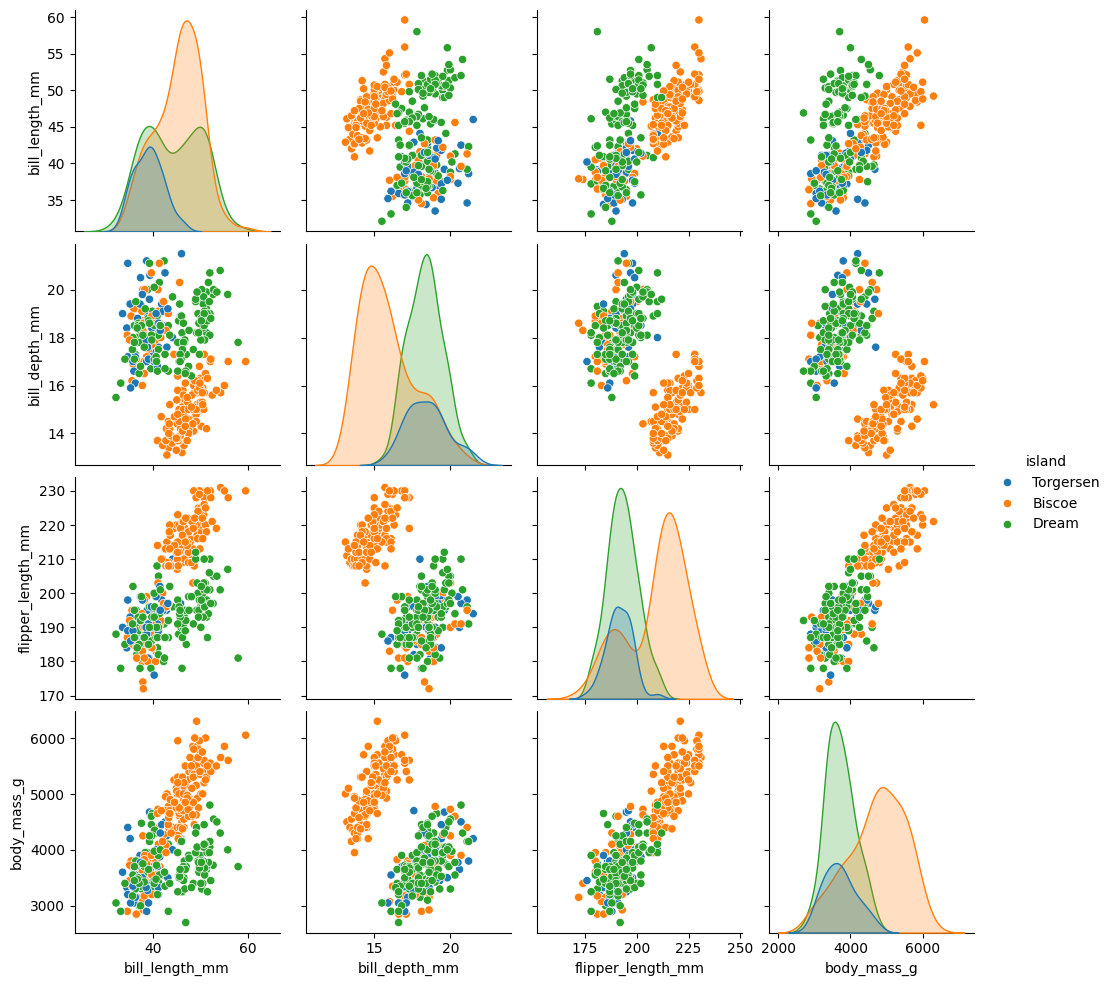

In [23]:
sns.pairplot(df,hue= 'island')

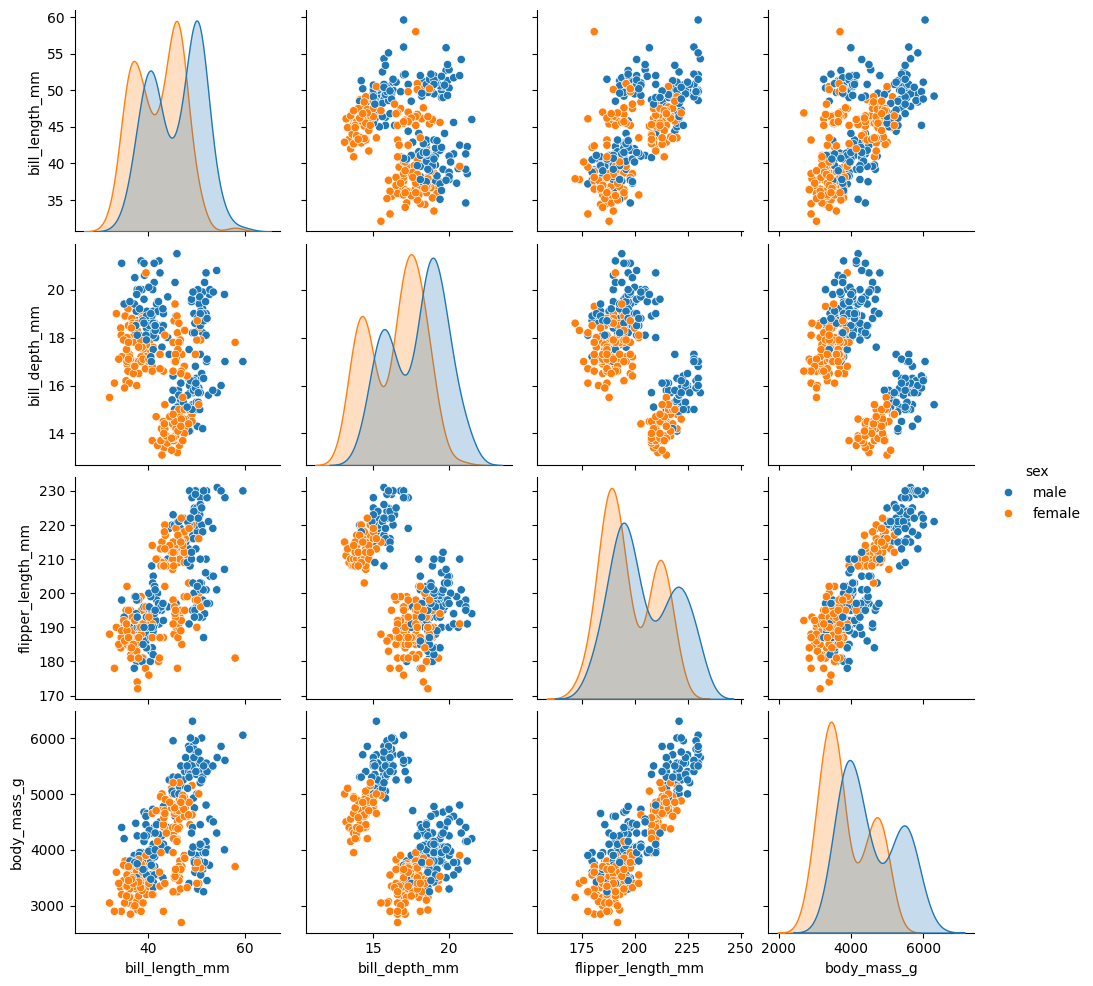

In [24]:
sns.pairplot(df,hue= 'sex')

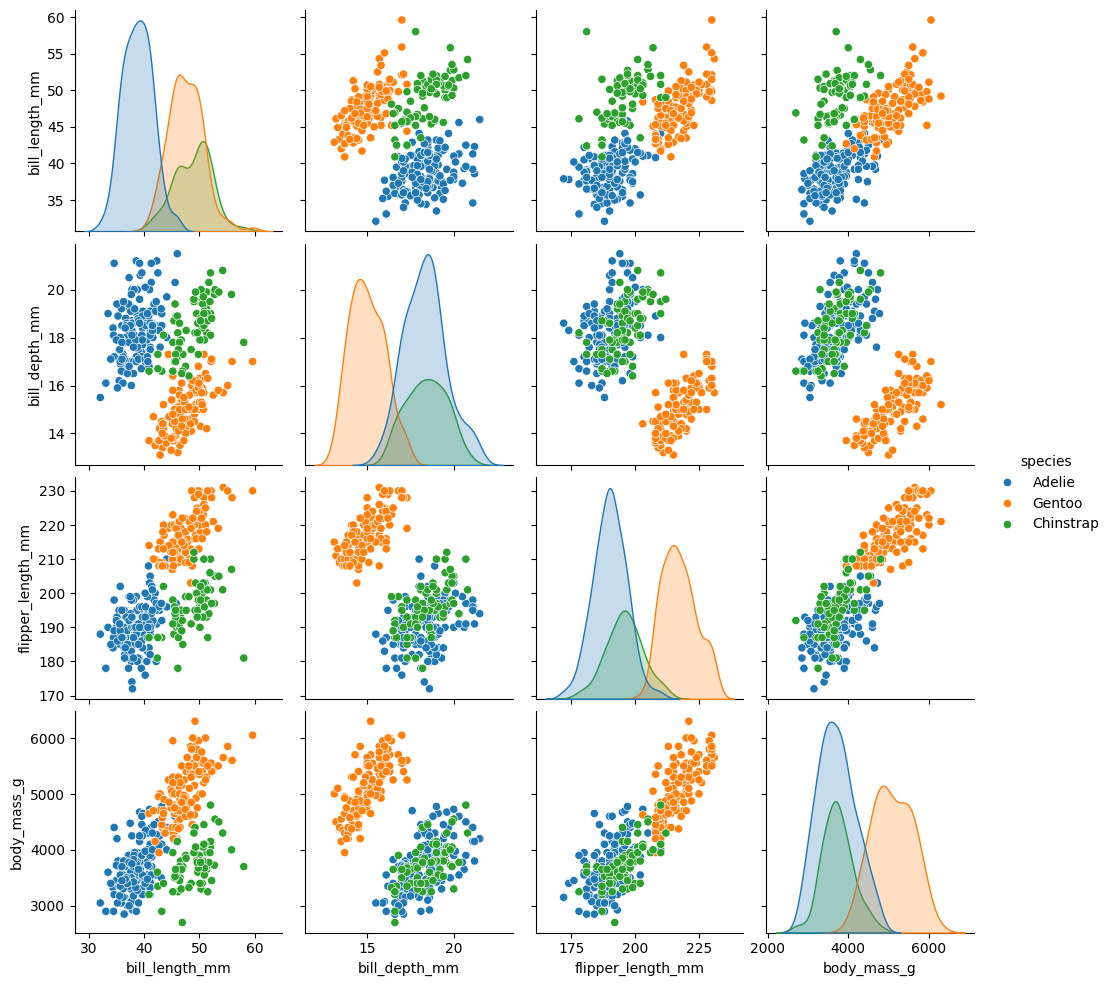

In [25]:
sns.pairplot(df,hue= 'species')

In [26]:
sns.heatmap(df.corr(), annot= True)

ValueError: could not convert string to float: 'Adelie'

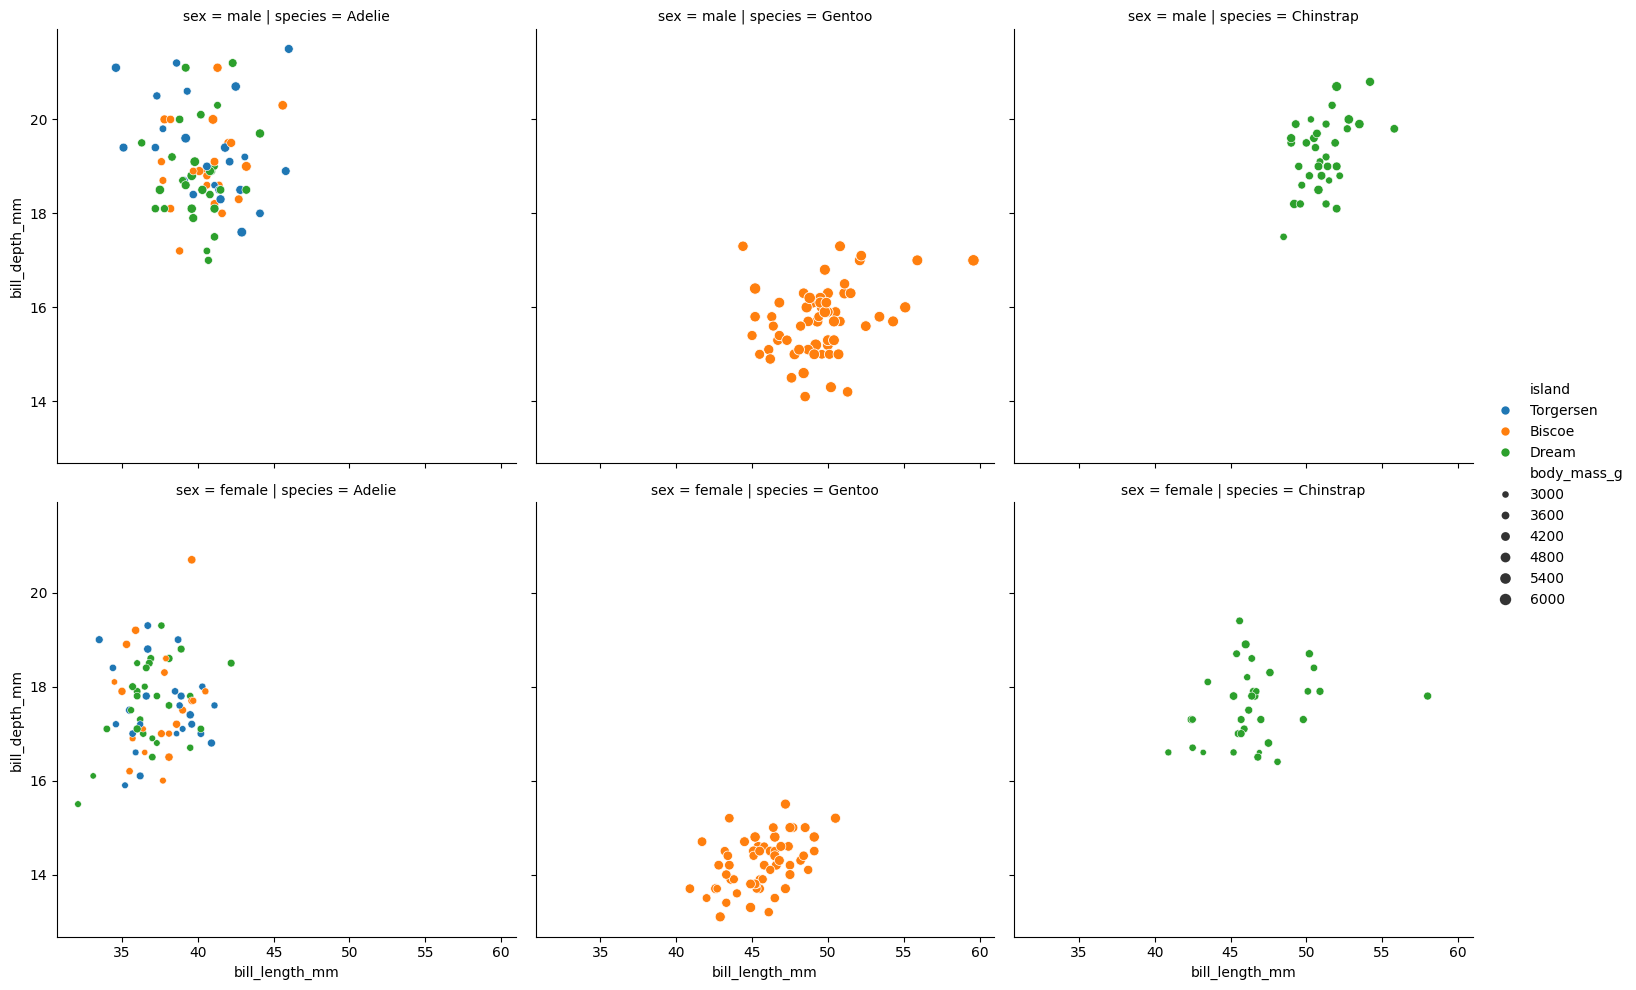

In [ ]:
sns.relplot(x="bill_length_mm", y="bill_depth_mm", hue="island",
                col="species", row="sex",size= 'body_mass_g', data=df)

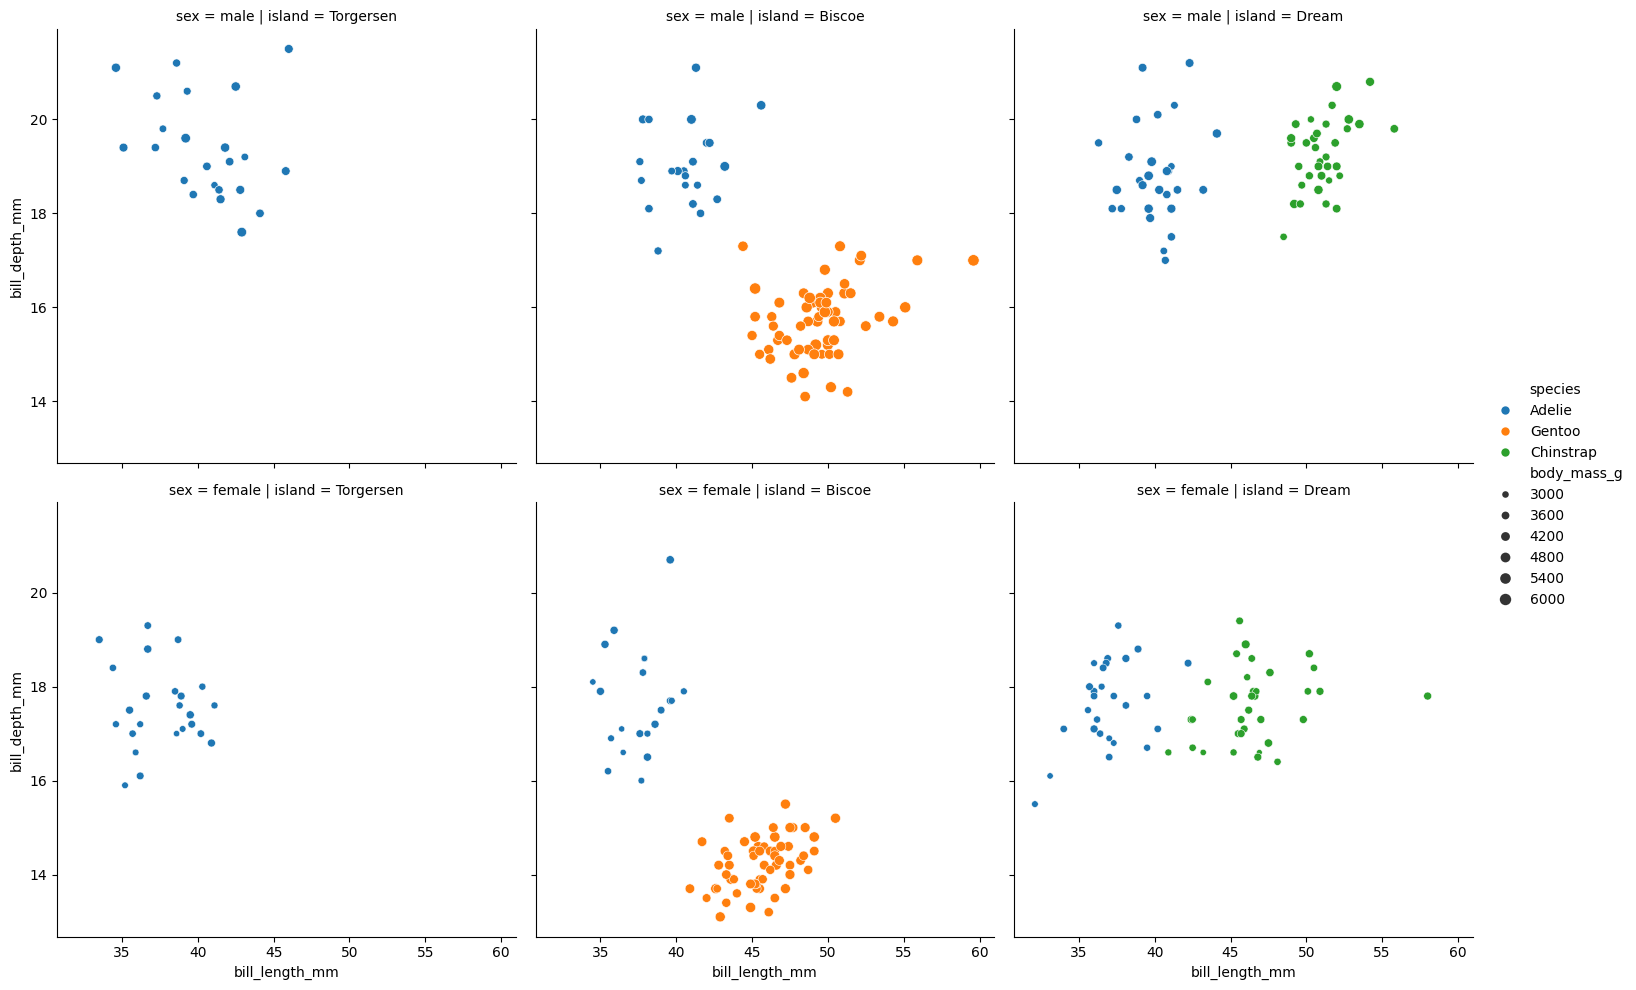

In [ ]:
sns.relplot(x="bill_length_mm", y="bill_depth_mm", hue="species",
                col="island", row="sex",size= 'body_mass_g', data=df)

## MODELLO

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [28]:
dummies = pd.get_dummies(df[['island','sex']], drop_first=True,dtype=int)
df = pd.concat([df,dummies],axis=1).drop(['island','sex'],axis=1)
df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_male
0,Adelie,39.1,18.7,181,3750,0,1,1
1,Adelie,39.5,17.4,186,3800,0,1,0
2,Adelie,40.3,18.0,195,3250,0,1,0
3,Adelie,36.7,19.3,193,3450,0,1,0
4,Adelie,39.3,20.6,190,3650,0,1,1
...,...,...,...,...,...,...,...,...
328,Chinstrap,55.8,19.8,207,4000,1,0,1
329,Chinstrap,43.5,18.1,202,3400,1,0,0
330,Chinstrap,49.6,18.2,193,3775,1,0,1
331,Chinstrap,50.8,19.0,210,4100,1,0,1


In [29]:
df['species'] = df['species'].map({'Adelie':0,'Gentoo':1,'Chinstrap':2})

In [30]:
df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_male
0,0,39.1,18.7,181,3750,0,1,1
1,0,39.5,17.4,186,3800,0,1,0
2,0,40.3,18.0,195,3250,0,1,0
3,0,36.7,19.3,193,3450,0,1,0
4,0,39.3,20.6,190,3650,0,1,1
...,...,...,...,...,...,...,...,...
328,2,55.8,19.8,207,4000,1,0,1
329,2,43.5,18.1,202,3400,1,0,0
330,2,49.6,18.2,193,3775,1,0,1
331,2,50.8,19.0,210,4100,1,0,1


In [ ]:
X = df.values
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
inertia = []
for n in range(2 , 6):
    algorithm = (KMeans(n_clusters = n ,
                        init='k-means++',
                        n_init = 10 ,
                        max_iter=300,
                        tol=0.001,
                        random_state= 667  ,
                        algorithm='elkan'))
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)

In [39]:
inertia

[57198284.017535426,
 28372401.915536497,
 15999192.290709486,
 10955676.970117792]

In [40]:
import matplotlib.pyplot as plt

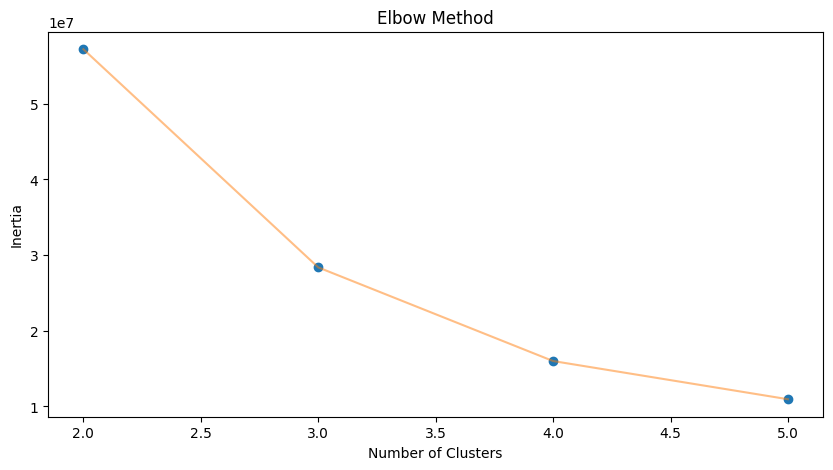

In [42]:
plt.figure(1 , figsize = (10 ,5))
plt.plot(np.arange(2 , 6) , inertia , 'o')
plt.plot(np.arange(2 , 6) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [43]:
algorithm = KMeans(n_clusters = 3,
                   init='k-means++',
                   n_init = 10 ,
                   max_iter=300,
                   tol=0.0001,
                   random_state= 667,
                   algorithm='elkan')
algorithm.fit(X)
labels = algorithm.labels_

In [44]:
from sklearn.cluster import AgglomerativeClustering

AggC = AgglomerativeClustering(n_clusters = None, distance_threshold=0)
AggC.fit(X)

labels = AggC.labels_

In [45]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

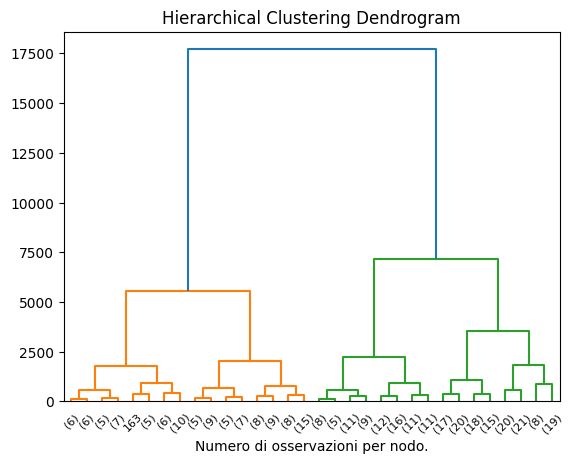

In [46]:
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(AggC, truncate_mode='level', p=4)
plt.xlabel("Numero di osservazioni per nodo.")
plt.show()